### 중심경향도

중심경향도(중심화 경향)는 데이터를 분석할 때, 값들이 중심으로 얼마나 모이는지를 측정하는 통계 개념

이는 데이터 분포의 중심을 나타내는 대표값들을 통해 설명된다.

In [3]:
# 필요한 라이브러리 호출
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 1.  중심경향도 기본 이해

## 1) Simple data 형성

In [4]:
# 데이터 랜덤하게 형성 (seed 부여)
np.random.seed(1)

# 12개월 동안 발생한 특정 회사 A의 판매 건수라고 가정
X = np.random.randint(1,20,12)
print(X)

[ 6 12 13  9 10 12  6 16  1 17  2 13]


## 2) 데이터 시각화

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing f

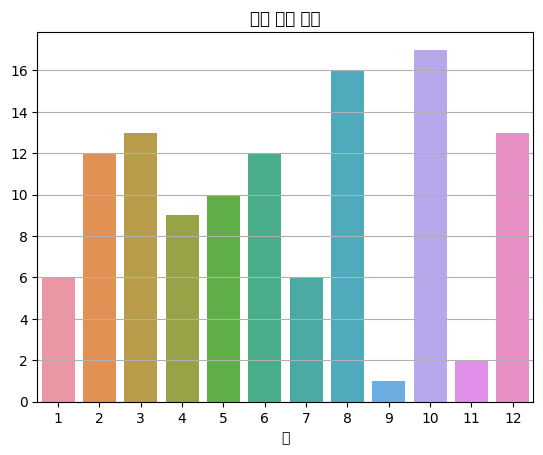

In [5]:
# 데이터 보기 (시각화로 각 원소별 개수를 출력)

sns.barplot(x= list(map(lambda x: x , range(1,13))), y=X)
plt.title('월별 판매 건수')
plt.xlabel('월')
plt.grid(axis='y')
plt.show()

## 3) 평균 

### (1) 산술평균

데이터의 평균값을 계산

(전체 합) / (전체 데이터 개수)

In [6]:
print(X.sum()/len(X))

print(X.mean())

# 만약, 소수점을 출력하지 않는 경우 (round 반올림 함수 이용)

print(round(X.mean()))

9.75
9.75
10


### (2) 기하평균

변화율 도출하기 (월별 건수가 얼마의 비율로 변화되었는지)

In [82]:
rate = []
for i in range(len(X)-1):
    rate.append((( (X[i+1]) / X[i] )))

for i in range(11):
    print(f'{i+1}월 대비 {i+2}월의 판매건수 비율은 약 {rate[i]*100 : .2f}% 입니다.')

1월 대비 2월의 판매건수 비율은 약  200.00% 입니다.
2월 대비 3월의 판매건수 비율은 약  108.33% 입니다.
3월 대비 4월의 판매건수 비율은 약  69.23% 입니다.
4월 대비 5월의 판매건수 비율은 약  111.11% 입니다.
5월 대비 6월의 판매건수 비율은 약  120.00% 입니다.
6월 대비 7월의 판매건수 비율은 약  50.00% 입니다.
7월 대비 8월의 판매건수 비율은 약  266.67% 입니다.
8월 대비 9월의 판매건수 비율은 약  6.25% 입니다.
9월 대비 10월의 판매건수 비율은 약  1700.00% 입니다.
10월 대비 11월의 판매건수 비율은 약  11.76% 입니다.
11월 대비 12월의 판매건수 비율은 약  650.00% 입니다.


In [6]:
# 변수 설정 (simple data X는 동일)
# 곱셈에 대한 항등원 1
mulScores = 1 

# 항목들로 반복 (rate의 모든 항목을 곱셈하기 위한 코드)
for item in rate:
    mulScores *= item
print(f'변화율의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(rate)) 
print(f'해당 데이터의 기하평균(=평균 증가율) 값은 약 {geometricMean1*100}% 입니다.')

변화율의 모든 값을 곱하면 2.166666666666666가 됩니다.
해당 데이터의 기하평균(=평균 증가율) 값은 약 107.28192428296298% 입니다.


### (3) 가중평균

In [83]:
# 가중치도 랜덤으로 설정합니다. (각 의미는 매출이 아닌 순이익의 비율로 가정해봅니다.)
np.random.seed(2022)
weight = np.random.randint(1, 5, 12)

print('가중치 :',weight)
print('판매 건수 :',X)
print('판매 건수의 순이익에 대한 가중평균 값 :', sum(X * weight)/sum(weight))

가중치 : [2 1 2 1 2 2 1 4 1 3 1 1]
판매 건수 : [ 6 12 13  9 10 12  6 16  1 17  2 13]
판매 건수의 순이익에 대한 가중평균 값 : 11.428571428571429


### (4) 절사평균

In [8]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정 (양 극단 5%의 데이터 제외)
cut = 0.05
n = len(X)
tem_data = sorted(X)
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data]}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {np.mean(tem_data[cut_data : -cut_data])}입니다.')

5.0% 비율로 절사한 후 data는 [2, 6, 6, 9, 10, 12, 12, 13, 13, 16]입니다.
5.0% 비율로 절사한 후 data의 평균은 9.9입니다.


## 4) 중위값 도출

In [9]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(X)
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

# np.median을 사용
print(np.median(X))

[1, 2, 6, 6, 9, 10, 12, 12, 13, 13, 16, 17]
6
11.0
11.0


# 2. 삼성전자 데이터

In [66]:
import yfinance

# 야후 파이낸스를 이용하여 주가 정보를 다운받습니다.
samsung_price = yfinance.download('005930.KS', '2022-01-01', '2022-01-18')
samsung_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,78800.0,79200.0,78300.0,78700.0,78700.0,12427416
2022-01-05,78800.0,79000.0,76400.0,77400.0,77400.0,25470640
2022-01-06,76700.0,77600.0,76600.0,76900.0,76900.0,12931954
2022-01-07,78100.0,78400.0,77400.0,78300.0,78300.0,15163757
2022-01-10,78100.0,78100.0,77100.0,78000.0,78000.0,9947422
2022-01-11,78400.0,79000.0,78000.0,78900.0,78900.0,13221123
2022-01-12,79500.0,79600.0,78600.0,78900.0,78900.0,11000502
2022-01-13,79300.0,79300.0,77900.0,77900.0,77900.0,13889401
2022-01-14,77700.0,78100.0,77100.0,77300.0,77300.0,10096725


EDA

Date
2022-01-04    78700.0
2022-01-05    77400.0
2022-01-06    76900.0
2022-01-07    78300.0
2022-01-10    78000.0
2022-01-11    78900.0
2022-01-12    78900.0
2022-01-13    77900.0
2022-01-14    77300.0
2022-01-17    77500.0
Name: Adj Close, dtype: float64


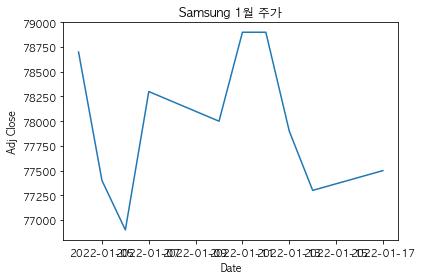

In [67]:
# 데이터 보기
print(samsung_price['Adj Close'])

sns.lineplot(x=samsung_price.index,
             y=samsung_price['Adj Close'], 
             data=samsung_price)
plt.title('Samsung 1월 주가')
plt.show()

### 1) 평균

#### (1) 산술평균

In [68]:
# 데이터의 평균값을 도출해보기 (전체 합 / 전체 데이터 개수)

print(samsung_price['Adj Close'].sum()/len(samsung_price['Adj Close']))

print(samsung_price['Adj Close'].mean())

# 만약, 소수점 2째 자리까지만 출력하는 경우 (round 반올림 함수 이용)

print(round(samsung_price['Adj Close'].mean(), 2))

77980.0
77980.0
77980.0


In [69]:
# 평균값 도출을 위한 함수입니다.
def mean(data, column_name):
    print(f'해당 데이터의 컬럼 중 {column_name}의 평균값(mean)은 {data[column_name].mean()} 입니다.')

mean(samsung_price, 'Adj Close')

해당 데이터의 컬럼 중 Adj Close의 평균값(mean)은 77980.0 입니다.


#### (2) 기하평균

In [70]:
# 증감률 도출하기 (월별 범죄 건수가 어떤 비율로 증감되었는지)
rate = []
for i in range(len(samsung_price['Adj Close'])-1):
    rate.append((( (samsung_price['Adj Close'][i+1] ) / samsung_price['Adj Close'][i] )))


for i in range(len(samsung_price['Adj Close'])-1):
    print(f'2월 {i+1}번재 영업일 대비 2월 {i+2}번재 영업일의 조정종가는 약 {rate[i]*100 -100 : .2f}% 입니다.')

2월 1번재 영업일 대비 2월 2번재 영업일의 조정종가는 약 -1.65% 입니다.
2월 2번재 영업일 대비 2월 3번재 영업일의 조정종가는 약 -0.65% 입니다.
2월 3번재 영업일 대비 2월 4번재 영업일의 조정종가는 약  1.82% 입니다.
2월 4번재 영업일 대비 2월 5번재 영업일의 조정종가는 약 -0.38% 입니다.
2월 5번재 영업일 대비 2월 6번재 영업일의 조정종가는 약  1.15% 입니다.
2월 6번재 영업일 대비 2월 7번재 영업일의 조정종가는 약  0.00% 입니다.
2월 7번재 영업일 대비 2월 8번재 영업일의 조정종가는 약 -1.27% 입니다.
2월 8번재 영업일 대비 2월 9번재 영업일의 조정종가는 약 -0.77% 입니다.
2월 9번재 영업일 대비 2월 10번재 영업일의 조정종가는 약  0.26% 입니다.


In [71]:
# 변수 설정
mulScores = 1 # 곱셈에 대한 항등원 1

# 항목들로 반복 (tem_data의 모든 항목을 곱셈하기 위한 코드)
for item in rate:
    mulScores *= item
print(f'{rate} 내의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(rate)) 
print(f'해당 데이터의 기하평균 값은 {geometricMean1} 입니다.')

[0.9834815756035579, 0.9935400516795866, 1.0182054616384915, 0.9961685823754789, 1.0115384615384615, 1.0, 0.9873257287705957, 0.9922978177150192, 1.0025873221216042] 내의 모든 값을 곱하면 0.9847522236340532가 됩니다.
해당 데이터의 기하평균 값은 0.9982942099537445 입니다.


#### (3) 가중평균

Date
2022-01-04    12427416
2022-01-05    25470640
2022-01-06    12931954
2022-01-07    15163757
2022-01-10     9947422
2022-01-11    13221123
2022-01-12    11000502
2022-01-13    13889401
2022-01-14    10096725
2022-01-17     8785122
Name: Volume, dtype: int64


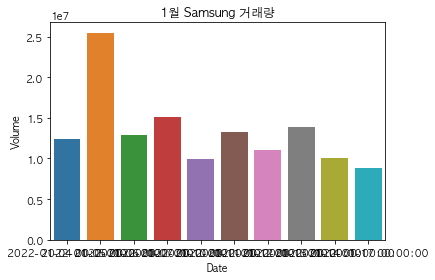

In [73]:
# 데이터 보기

print(samsung_price['Volume'])

sns.barplot(x = samsung_price.index, y = samsung_price['Volume'])
plt.title('1월 Samsung 거래량')
plt.show()

In [75]:
# 가중치는 범죄 발생으로 설정하고 검거율의 가중평균을 시행해봅니다.

print('거래량 :',samsung_price['Volume'].tolist())
print('조정종가 :',samsung_price['Adj Close'].tolist())

weight = samsung_price['Volume']
tem_data = samsung_price['Adj Close']

print('조정종가의 거래량에 대한 가중평균 값 :', sum(tem_data * weight)/sum(weight))

거래량 : [12427416, 25470640, 12931954, 15163757, 9947422, 13221123, 11000502, 13889401, 10096725, 8785122]
조정종가 : [78700.0, 77400.0, 76900.0, 78300.0, 78000.0, 78900.0, 78900.0, 77900.0, 77300.0, 77500.0]
조정종가의 거래량에 대한 가중평균 값 : 77945.01814591358


#### (4) 절사평균

In [76]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행

# 변수 설정
cut = 0.15
n = len(samsung_price['Adj Close'])
tem_data = samsung_price['Adj Close']
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data].tolist()}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {tem_data[cut_data : -cut_data].mean()}입니다.')

15.0% 비율로 절사한 후 data는 [76900.0, 78300.0, 78000.0, 78900.0, 78900.0, 77900.0]입니다.
15.0% 비율로 절사한 후 data의 평균은 78150.0입니다.


## 2)중위값 도출

In [77]:
# 데이터 보기

print(samsung_price['Adj Close'])

Date
2022-01-04    78700.0
2022-01-05    77400.0
2022-01-06    76900.0
2022-01-07    78300.0
2022-01-10    78000.0
2022-01-11    78900.0
2022-01-12    78900.0
2022-01-13    77900.0
2022-01-14    77300.0
2022-01-17    77500.0
Name: Adj Close, dtype: float64


In [78]:
# 하나씩 실행해보는 부분

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(samsung_price['Adj Close'])
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 3번째 값과 -4번째 (= 2번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

[76900.0, 77300.0, 77400.0, 77500.0, 77900.0, 78000.0, 78300.0, 78700.0, 78900.0, 78900.0]
5
77950.0


In [80]:
# 중위값(median) 도출을 위한 함수입니다. (파이썬 함수를 활용한 중위값 출력 부분)
def mean(data, column_name = '발생'):
    print(f'해당 데이터의 컬럼 중 {column_name}의 중위값(median)은 {data[column_name].median()} 입니다.')
    
mean(samsung_price, 'Adj Close')

해당 데이터의 컬럼 중 Adj Close의 중위값(median)은 77950.0 입니다.
